# Creating our own prediction model void of predictor variables from data

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(6,6)})
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
df = pd.read_csv("data/compas-scores-two-years.csv")
df.shape
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [27]:
pd.set_option('max_columns',53)

df = df.drop(['first','last','race','decile_score','c_offense_date',
         'r_offense_date','type_of_assessment',
         'decile_score.1','score_text','v_type_of_assessment',
         'v_decile_score',"v_score_text",'v_screening_date',
         'in_custody','out_custody','c_case_number','c_days_from_compas',
         'is_recid','r_case_number','r_days_from_arrest','r_jail_in','r_jail_out',
         'violent_recid','vr_case_number','vr_charge_degree','vr_offense_date',
         'screening_date','days_b_screening_arrest','c_arrest_date','name',
         'compas_screening_date','id','dob','c_jail_in','c_jail_out', 'age_cat',
         'priors_count.1', 'decile_score.1', 'r_charge_degree', 'two_year_recid'],axis=1)
df.shape

(7214, 14)

In [28]:
nums = df.select_dtypes(np.number).fillna(0)

In [29]:
print(nums.shape)
nums.head()
nums['time_in']= nums['end']-nums['start']
nums.drop(['start','end'],axis=1)
nums.reset_index()
nums.tail(20)

(7214, 9)


,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,is_violent_recid,start,end,event,time_in
7194,30,0,0,0,2,1,1,351,1,350
7195,35,0,0,0,8,0,62,393,1,331
7196,43,0,0,0,0,0,0,938,0,938
7197,28,0,0,0,1,0,0,764,0,764
7198,32,0,0,0,4,0,0,653,0,653
7199,23,0,0,0,0,0,2,913,0,911
7200,20,0,0,0,0,0,4,22,1,18
7201,30,0,1,0,19,0,9,144,1,135
7202,26,0,0,0,0,0,173,322,0,149
7203,44,0,0,0,0,0,0,887,0,887


In [30]:
obj = df.select_dtypes(object)
obj = obj.drop(['r_charge_desc','c_charge_desc','vr_charge_desc'],axis=1)
obj

,sex,c_charge_degree
0,Male,F
1,Male,F
2,Male,F
3,Male,F
4,Male,F
...,...,...
7209,Male,F
7210,Male,F
7211,Male,F
7212,Female,M


In [31]:
obj_binary = pd.get_dummies(obj,
                            dtype="int64",
                            drop_first = False
).reset_index()

In [32]:
obj_binary.shape

(7214, 5)

In [33]:
df_clean = pd.concat([obj_binary, nums], axis = 1)

In [34]:
df_clean.head()
df_clean = df_clean.drop(['start','end','event'],axis=1)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [36]:
y = df_clean['is_violent_recid']
X = df_clean.drop('is_violent_recid',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
X.drop('index',axis=1)

,sex_Female,sex_Male,c_charge_degree_F,c_charge_degree_M,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,time_in
0,0,1,1,0,69,0,0,0,0,327
1,0,1,1,0,34,0,0,0,0,150
2,0,1,1,0,24,0,0,1,4,63
3,0,1,1,0,23,0,1,0,1,1174
4,0,1,1,0,43,0,0,0,2,1102
...,...,...,...,...,...,...,...,...,...,...
7209,0,1,1,0,23,0,0,0,0,859
7210,0,1,1,0,23,0,0,0,0,789
7211,0,1,1,0,57,0,0,0,0,808
7212,1,0,0,1,33,0,0,0,3,754


In [37]:
df_clean.head()

,index,sex_Female,sex_Male,c_charge_degree_F,c_charge_degree_M,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,is_violent_recid,time_in
0,0,0,1,1,0,69,0,0,0,0,0,327
1,1,0,1,1,0,34,0,0,0,0,1,150
2,2,0,1,1,0,24,0,0,1,4,0,63
3,3,0,1,1,0,23,0,1,0,1,0,1174
4,4,0,1,1,0,43,0,0,0,2,0,1102


In [38]:
model = LogisticRegression()

In [39]:
from sklearn.model_selection import cross_val_score
cross_val_score(
    model, X, y, scoring = "accuracy", cv = 10
).mean()

0.8864703916152159

In [40]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
predictions = model.predict(X)
predct_prob  = model.predict_proba(X)
predct_prob = predct_prob[:,0]

In [42]:
df_clean['predictions'] = predictions

In [43]:
df_clean['predict_prob'] = predct_prob

df_clean.head(20)

,index,sex_Female,sex_Male,c_charge_degree_F,c_charge_degree_M,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,is_violent_recid,time_in,predictions,predict_prob
0,0,0,1,1,0,69,0,0,0,0,0,327,0,0.946257
1,1,0,1,1,0,34,0,0,0,0,1,150,0,0.820149
2,2,0,1,1,0,24,0,0,1,4,0,63,0,0.749072
3,3,0,1,1,0,23,0,1,0,1,0,1174,0,0.986253
4,4,0,1,1,0,43,0,0,0,2,0,1102,0,0.990845
5,5,0,1,0,1,44,0,0,0,0,0,852,0,0.968649
6,6,0,1,1,0,41,0,0,0,14,0,35,0,0.779956
7,7,0,1,1,0,43,0,0,0,3,0,265,0,0.887965
8,8,1,0,0,1,39,0,0,0,0,0,745,0,0.962458
9,9,0,1,1,0,21,0,0,0,1,1,428,0,0.889326


In [44]:
df_clean[df_clean['is_violent_recid']!=df_clean['predictions']].shape

(816, 14)

## Age vs. violent recidivism according to the predictions of this model

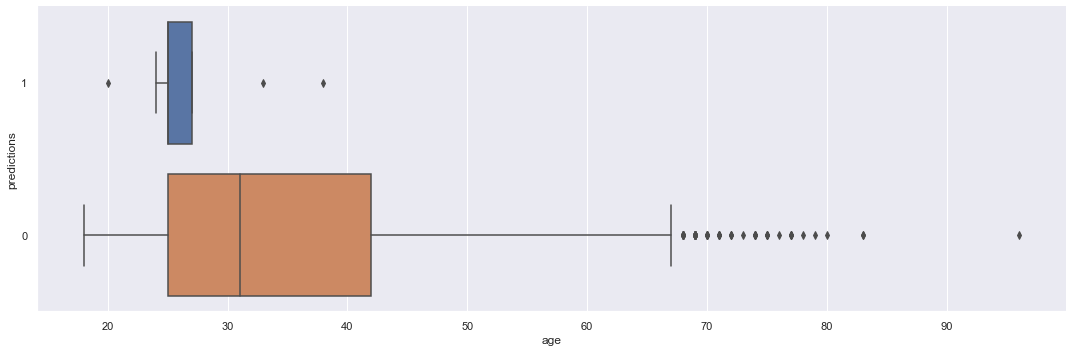

In [45]:
sns.catplot(data=df_clean, x='age', y='predictions', aspect = 3, kind = 'box', orient = 'h', order = [1,0])

In [46]:
df_clean['age'].corr(df_clean['predictions'])

-0.02357306230328258

In [47]:
df_clean['age'].corr(df_clean['two_year_recid'])

KeyError: 'two_year_recid'

## Prior charges vs. two-year recidivism according to the predictions of this model

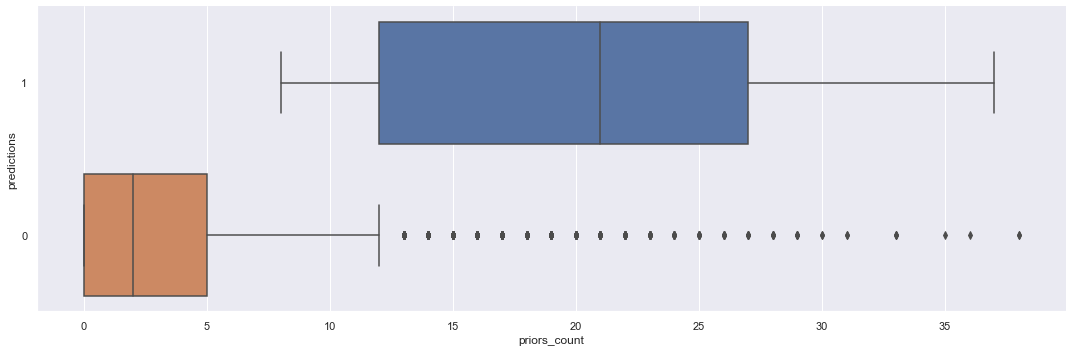

In [48]:
sns.catplot(data=df_clean, x='priors_count', y='predictions', aspect = 3, kind = 'box', orient = 'h', order = [1,0])

In [49]:
xy = df_clean['priors_count'].corr(df_clean['predictions'])
xy

0.12125468327911737

In [31]:
xz = df_clean['priors_count'].corr(df_clean['two_year_recid'])
xz

0.2751168775635826

## Check for significance

In [28]:
import numpy as np
from scipy.stats import t, norm
from math import atanh, pow
from numpy import tanh

In [29]:
def dependent_corr(xy, xz, yz, n, twotailed=True, conf_level=0.95):
    """
    Calculates the statistical significance between two dependent correlation coefficients
    @param xy: correlation coefficient between x and y
    @param xz: correlation coefficient between x and z
    @param yz: correlation coefficient between y and z
    @param n: number of elements in x, y and z
    @param twotailed: whether to calculate a one or two tailed test, only works for 'steiger' method
    @param conf_level: confidence level, only works for 'zou' method
    @param method: defines the method uses, 'steiger' or 'zou'
    @return: t and p-val
    """
    d = xy - xz
    determin = 1 - xy * xy - xz * xz - yz * yz + 2 * xy * xz * yz
    av = (xy + xz)/2
    cube = (1 - yz) * (1 - yz) * (1 - yz)

    t2 = d * np.sqrt((n - 1) * (1 + yz)/(((2 * (n - 1)/(n - 3)) * determin + av * av * cube)))
    p = 1 - t.cdf(abs(t2), n - 3)

    if twotailed:
        p *= 2
    
    return t2, p

In [32]:
yz = df_clean['predictions'].corr(df_clean['two_year_recid'])
yz

0.7375013060682962

In [33]:
df_clean.describe()

,index,sex_Female,sex_Male,c_charge_degree_F,c_charge_degree_M,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,two_year_recid,time_in,predictions,predict_prob
count,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,3606.500000,0.193374,0.806626,0.646798,0.353202,34.817993,0.067230,0.090934,0.109371,3.472415,0.450652,541.971583,0.466731,0.559939
std,2082.646754,0.394971,0.394971,0.477998,0.477998,11.888922,0.473972,0.485239,0.501586,4.882538,0.497593,400.488113,0.498927,0.386743
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-256.000000,0.000000,0.000062
25%,1803.250000,0.000000,1.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,0.139329
50%,3606.500000,0.000000,1.000000,1.000000,0.000000,31.000000,0.000000,0.000000,0.000000,2.000000,0.000000,509.000000,0.000000,0.625347
75%,5409.750000,0.000000,1.000000,1.000000,1.000000,42.000000,0.000000,0.000000,0.000000,5.000000,1.000000,907.000000,1.000000,0.955991
max,7213.000000,1.000000,1.000000,1.000000,1.000000,96.000000,20.000000,13.000000,17.000000,38.000000,1.000000,1186.000000,1.000000,0.997132


In [34]:
dependent_corr(xy, xz, yz, 7214, twotailed = True)

(4.9062611273191825, 9.486383143464394e-07)

### This model reduces the disparity between prior offenses and predicted recidivism, but the observed correlation is still significantly different from the true correlation 